<a href="https://colab.research.google.com/github/kxtubh/LipNet/blob/main/cnn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
objective: build an image classifer using cnn to classify almost any images
"""

'\nobjective: build an image classifer using cnn to classify almost any images\n'

#1.0 Import Libraries

In [2]:

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr

#2.0 Building a data pipline

In [13]:
data_dir = "/content/cnn_images"

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png','svg']

In [15]:
os.listdir("/content/cnn_images")

['cats', '.ipynb_checkpoints', 'dogs']

#2.1 Removing unnecessary and dodgy images

In [16]:


for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/cnn_images/cats/vector8.svg
Image not in ext list /content/cnn_images/cats/Scottish-fold-cat.jpg
Image not in ext list /content/cnn_images/cats/1200px-Cat_November_2010-1a.jpg
Image not in ext list /content/cnn_images/cats/vector2.svg
Image not in ext list /content/cnn_images/cats/vector10.svg
Image not in ext list /content/cnn_images/cats/Orange-colored-cat-yawns-displaying-teeth.jpg
Image not in ext list /content/cnn_images/cats/vector5.svg
Image not in ext list /content/cnn_images/cats/_127844807_henry_daniella_hutchinson.jpg.webp
Image not in ext list /content/cnn_images/cats/vector4.svg
Image not in ext list /content/cnn_images/cats/two-different-breeds-of-cats-side-by-side-outdoors-in-the-garden.jpg
Image not in ext list /content/cnn_images/cats/vector9.svg
Image not in ext list /content/cnn_images/cats/vector6.svg
Image not in ext list /content/cnn_images/cats/Collage-cats-cat-quiz-Mendel.jpg
Image not in ext list /content/cnn_images/cats/cats-part

#3. Load the data

In [19]:
data = tf.keras.utils.image_dataset_from_directory("/content/cnn_images")

Found 291 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

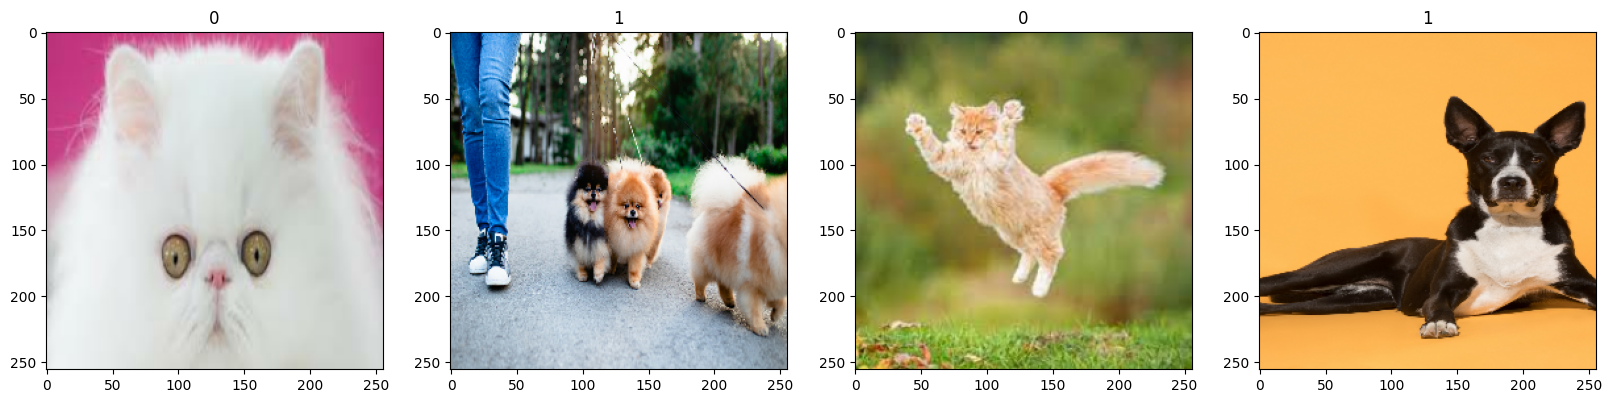

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Normalize the data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

#5. Split the data

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
len(data)

10

#6. Neural Network Design

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model=Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#7. Training

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist=model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 668ms/step - accuracy: 0.4852 - loss: 1.0815 - val_accuracy: 0.6406 - val_loss: 0.6788
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5152 - loss: 0.6896 - val_accuracy: 0.6719 - val_loss: 0.6724
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step - accuracy: 0.7252 - loss: 0.6617 - val_accuracy: 0.8281 - val_loss: 0.6067
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7395 - loss: 0.6045 - val_accuracy: 0.7969 - val_loss: 0.5076
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 846ms/step - accuracy: 0.7495 - loss: 0.5296 - val_accuracy: 0.8594 - val_loss: 0.4354
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8530 - loss: 0.4119 - val_accuracy: 0.9219 - val_loss: 0.2828
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8265 - loss: 0.3659 - val_accuracy: 0.9531 - val_loss: 0.3325
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9066 - loss: 0.2830 - val_accuracy: 0.9531 - val_loss: 0.1499
Epoch 

#8. Plot Performance

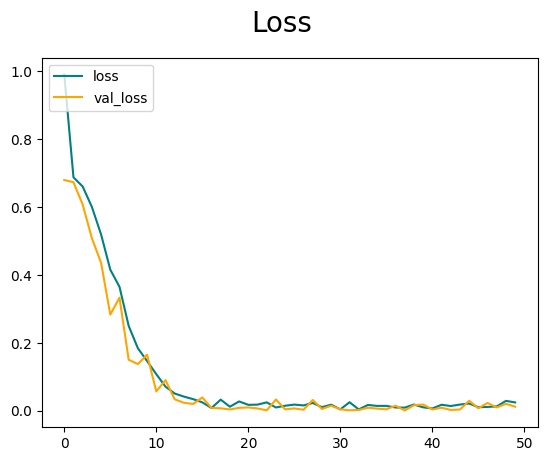

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

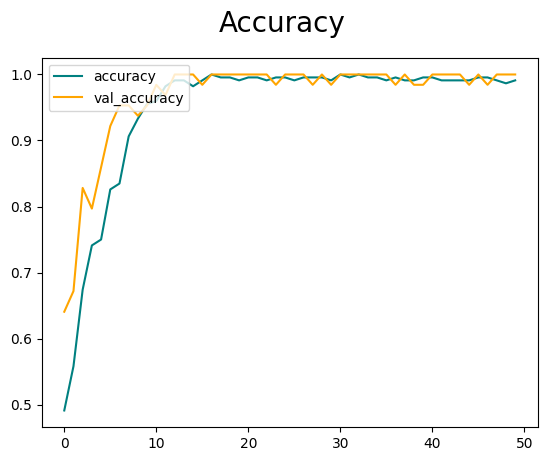

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#9. Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
 X,y=batch
 yhat=model.predict(X)
 pre.update_state(y, yhat)
 re.update_state(y, yhat)
 acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


#10. Test

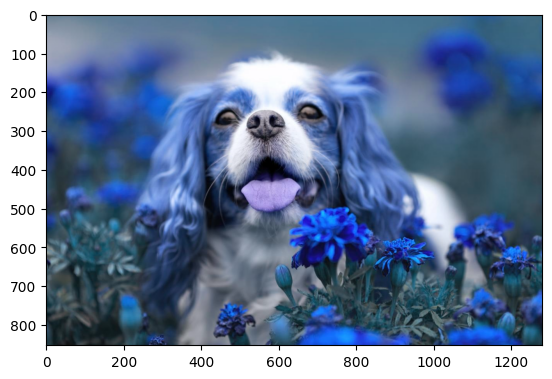

In [43]:
img=cv2.imread("/content/cnn_images/dogs/1655430860853.jpeg")
plt.imshow(img)
plt.show()

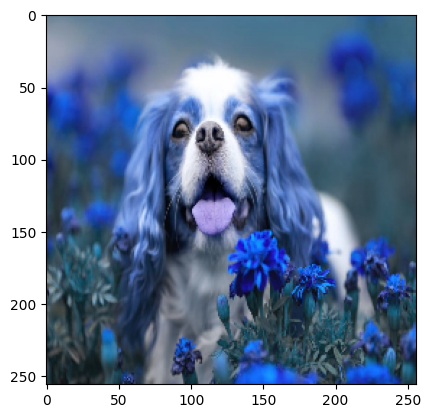

In [44]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


In [46]:
yhat

array([[0.99898916]], dtype=float32)

In [47]:
if yhat >0.5 :
 print('Predicted class is a Dog')
else:
  print('Predicted class is a Cat')

Predicted class is a Dog


#11. Save the model


In [50]:
model.save('img_cl.h5')


In [52]:
model.save_weights('img_cl.weights.h5')

#12 Reload the model

In [53]:

model_path = '/content/img_cl.h5'
loaded_model = tf.keras.models.load_model(model_path)